In [1]:
import pandas as pd

# Cargar el dataset Titanic desde GitHub
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df_titanic = pd.read_csv(url)

In [2]:
print(df_titanic.head())
print(df_titanic.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [3]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
from sklearn.model_selection import train_test_split

# Define 'X' como todas las columnas excepto 'Survived', y 'y' como la columna 'Survived'
X = df_titanic.drop(columns='Survived')
y = df_titanic['Survived']

# Eliminar columnas no relevantes
X = X.drop(columns=['PassengerId', 'Name'])

# Convertir variables categóricas usando One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')
print('Reporte de clasificación:')
print(report)

Precisión del modelo: 0.7932960893854749
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       105
           1       0.80      0.66      0.73        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



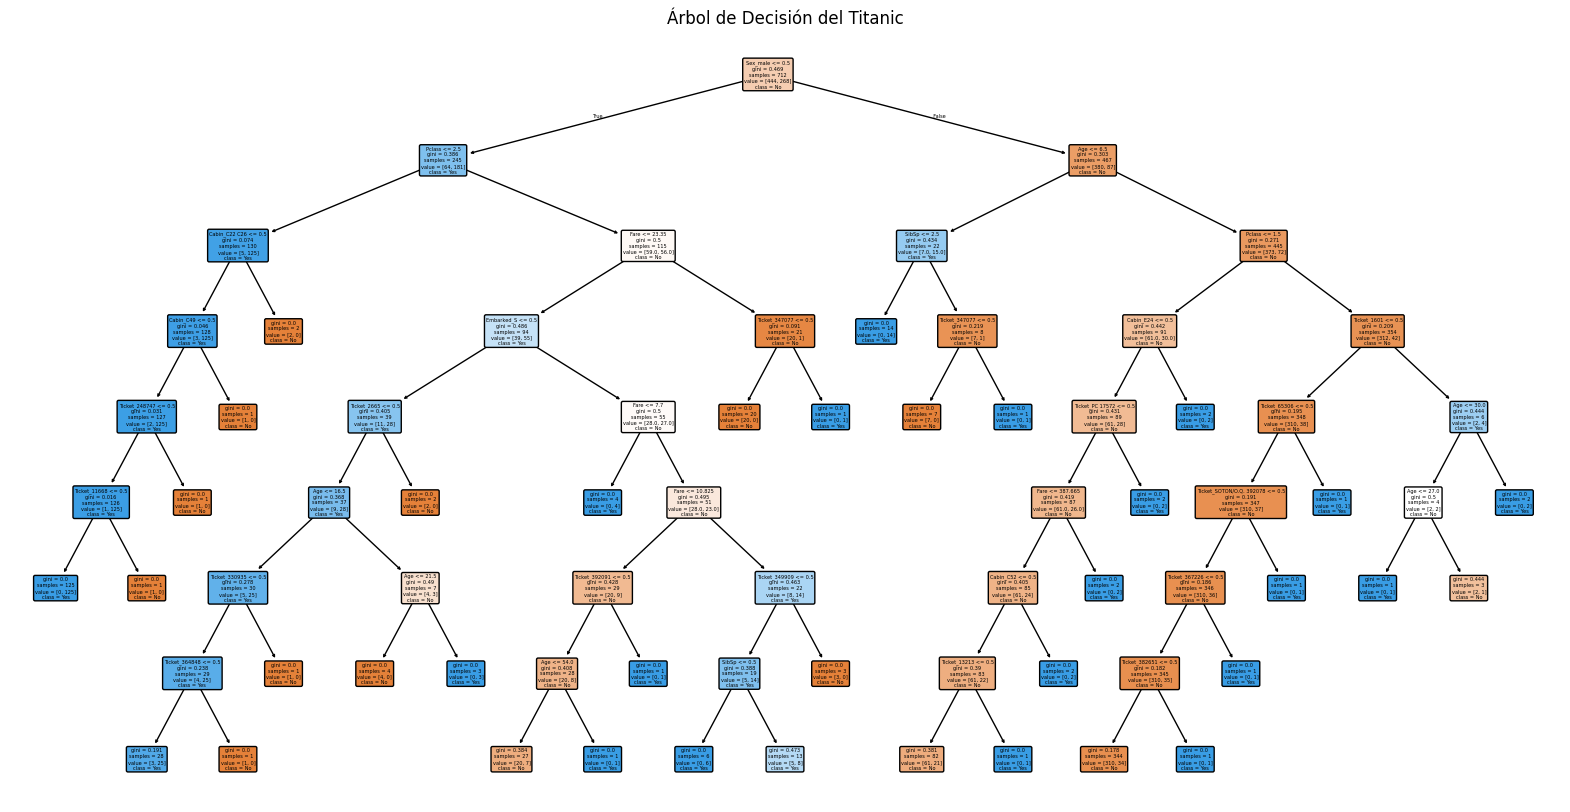

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Configura el tamaño de la figura
plt.figure(figsize=(20, 10))

# Visualiza el árbol de decisión
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)

# Muestra el gráfico
plt.title('Árbol de Decisión del Titanic')
plt.show()


In [ ]:
## Este es mi resultado base, sin hacer ningun tipo de optimización, como elimnación o creación de variables
## tratamiento de datos,...
## Ahora vamos a aplicar algún algoritmo de optimización 

In [15]:
# Obtener la importancia de las características
feature_importances = model.feature_importances_

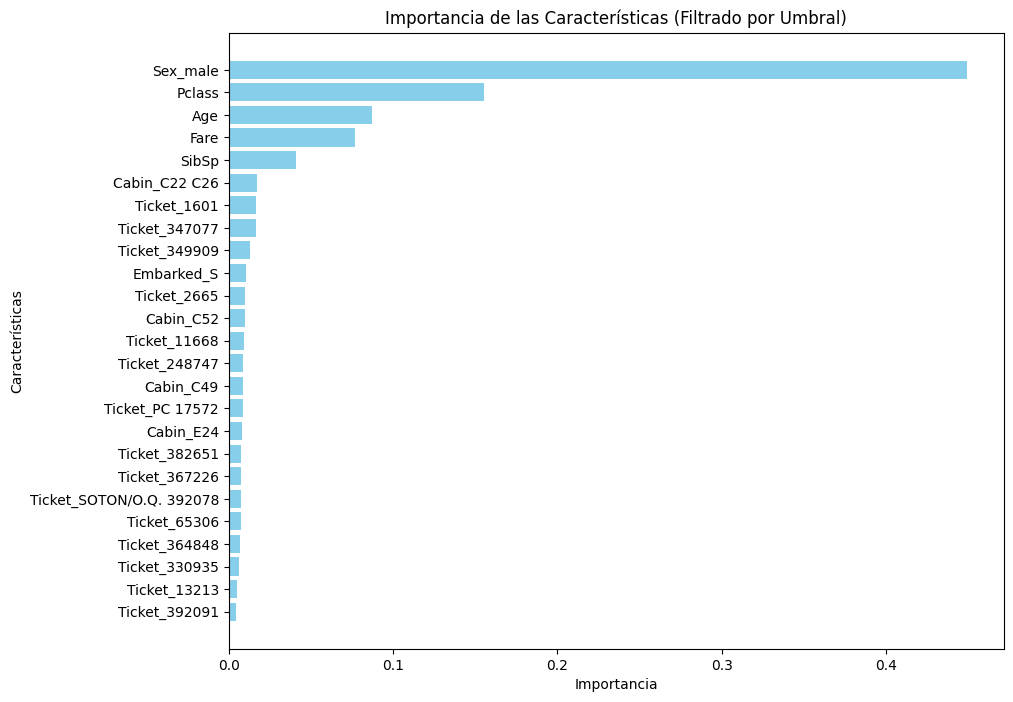

In [ ]:
import matplotlib.pyplot as plt

# Crear un DataFrame con las características y su importancia
feature_importance_df = pd.DataFrame({
    'feature': X.columns, ## seleccionamos las variables independientes 
    'importance': feature_importances  ## representamos la importancia de cada una con la featur_importance
})

# Filtrar el DataFrame para mostrar solo las características que cumplen con el umbral de importancia
importance_threshold = 0.0001
feature_importance_df = feature_importance_df[feature_importance_df['importance'] >= importance_threshold]

# Ordenar el DataFrame por importancia descendente
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)


# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características (Filtrado por Umbral)')
plt.gca().invert_yaxis()  # Invertir el eje Y para que las características más importantes estén arriba
plt.show()



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Ordenar el DataFrame de importancia y seleccionar las 5 características más importantes
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(10)['feature'].tolist()

# Filtrar los conjuntos de entrenamiento y prueba para incluir solo estas 5 características
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Entrenar el modelo con las 5 características más importantes
model = DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(X_train_top, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_top)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')
print('Reporte de clasificación:')
print(report)


Precisión del modelo: 0.8100558659217877
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

